In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tfrecords_filename = 'test.tfrecords'
batch_size = 64

In [3]:
def decode(serialized_example):
    """
    Parses an image and label from the given `serialized_example`.
    It is used as a map function for `dataset.map`
    """

    # 1. define a parser
    features = tf.compat.v1.parse_single_example(
        serialized_example,
        features={
            'height': tf.compat.v1.FixedLenFeature([], tf.int64),
            'width': tf.compat.v1.FixedLenFeature([], tf.int64),
            'channels': tf.compat.v1.FixedLenFeature([], tf.int64),
            'image_raw': tf.compat.v1.FixedLenFeature([], tf.string)
        })
    height = tf.cast(features['height'], tf.int32)
    width = tf.cast(features['width'], tf.int32)
    channels = tf.cast(features['channels'], tf.int32)
    image = tf.compat.v1.decode_raw(features['image_raw'], tf.uint8)
    image = tf.reshape(image, (64, 64, 3))
    return image

In [4]:
def normalize(image):
    image = tf.cast(image, tf.float32) * (1. / 255)
    return image

In [5]:
dataset = tf.data.TFRecordDataset(tfrecords_filename)
dataset = dataset.map(decode)
dataset = dataset.map(normalize)
dataset = dataset.batch(batch_size)

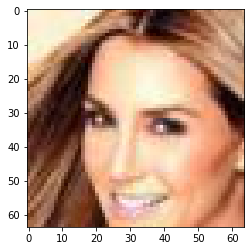

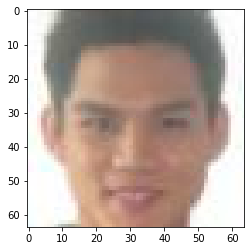

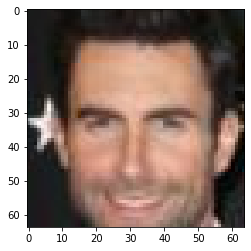

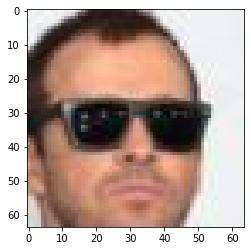

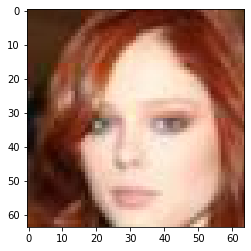

In [10]:
for image_batch in dataset:
#     print(image_batch.shape)
    plt.imshow(image_batch[0, :, :, :])
    plt.show()
    break